## Statistical Graph obtained from variable correlation through temporal data

In [4]:
dataset_path="data/asia_data_10000.csv"
import pandas as pd
import numpy as np

data = pd.read_csv(dataset_path)
# limit to first 1000 rows
# data = data[:1000]

In [5]:
import pandas as pd
# data=pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]})
f=data.corr()
f

,asia,tub,smoke,lung,bronc,either,xray,dysp
asia,1.000000,0.057458,0.017290,-0.019396,0.001011,0.006917,0.004380,0.004517
tub,0.057458,1.000000,-0.002142,0.010662,0.003760,0.402012,0.299082,0.074214
smoke,0.017290,-0.002142,1.000000,0.198012,0.306145,0.179042,0.126519,0.243146
lung,-0.019396,0.010662,0.198012,1.000000,0.065506,0.912673,0.673380,0.203552
bronc,0.001011,0.003760,0.306145,0.065506,1.000000,0.060468,0.039447,0.668539
either,0.006917,0.402012,0.179042,0.912673,0.060468,1.000000,0.738680,0.218549
xray,0.004380,0.299082,0.126519,0.673380,0.039447,0.738680,1.000000,0.144496
dysp,0.004517,0.074214,0.243146,0.203552,0.668539,0.218549,0.144496,1.000000


## Ground truth graph

In [4]:
!pip install pandas==1.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlearn 0.8.4 requires pandas==1.5.3, but you have pandas 1.5.0 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.0 which is incompatible.


[bnlearn] >Import <./data/asia.bif>
[bnlearn] >Loading bif file <./data/asia.bif>


[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


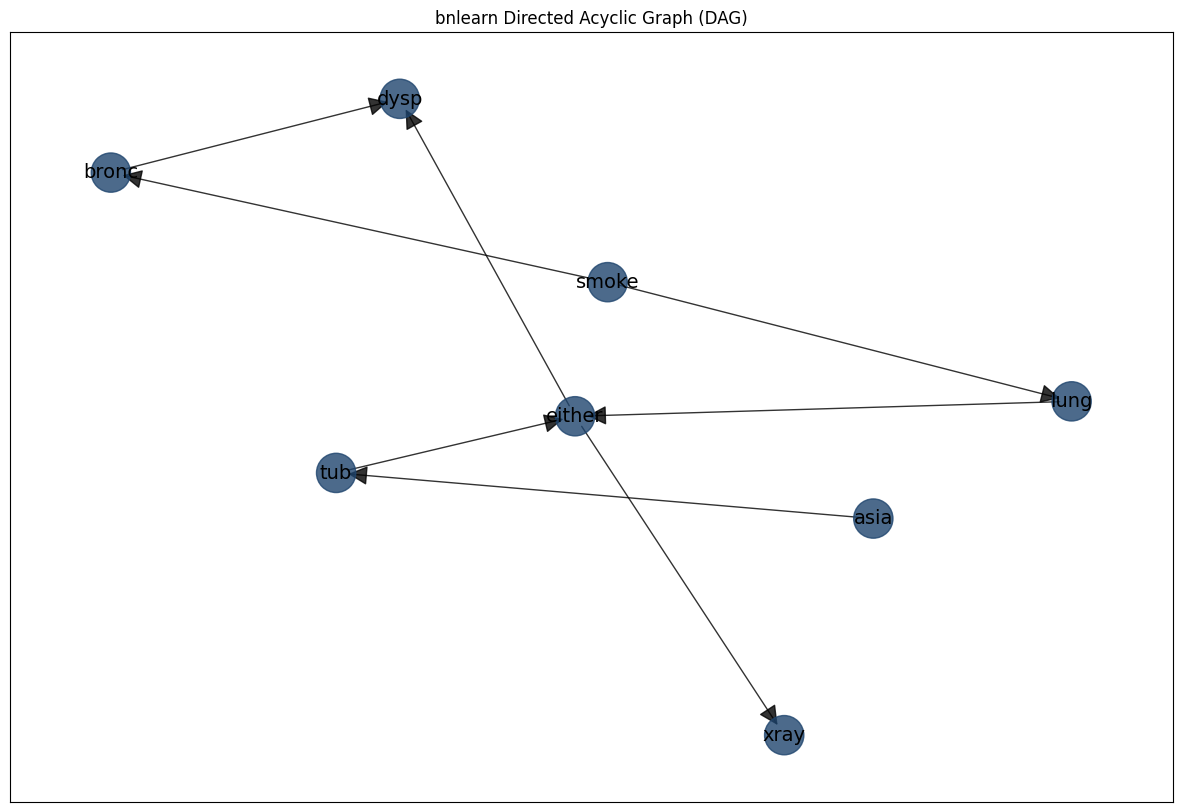

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'asia': array([ 0.10345376, -0.37743927]),
  'tub': array([-0.09610339, -0.24624215]),
  'smoke': array([0.00476517, 0.30194773]),
  'lung': array([ 0.17711808, -0.04058405]),
  'bronc': array([-0.17977582,  0.61687897]),
  'either': array([-0.00734222, -0.08345769]),
  'xray': array([ 0.07034889, -1.        ]),
  'dysp': array([-0.07246446,  0.82889647])},
 'G': <networkx.classes.digraph.DiGraph at 0x79bbd0f88550>,
 'node_properties': {'asia': {'node_color': '#1f456e', 'node_size': 800},
  'tub': {'node_color': '#1f456e', 'node_size': 800},
  'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e', 'node_size': 800},
  'bronc': {'node_color': '#1f456e', 'node_size': 800},
  'either': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800},
  'dysp': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties':

In [6]:
import bnlearn as bn

dag = bn.import_DAG(f'./data/asia.bif')
var_names = dag['adjmat'].columns
adj_mat = dag['adjmat'].to_numpy().astype(int)
df = bn.sampling(dag, n=10000)

data = df.to_numpy()

# plot the dag
bn.plot(dag)

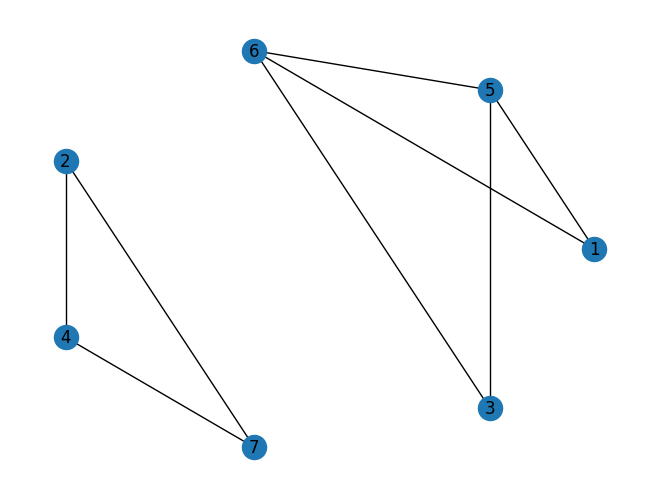

In [7]:
# construct a graph from the matrix after applying a fixed threshold
import networkx as nx
import matplotlib.pyplot as plt

# create a threshold
threshold = 0.24

# create a graph from the matrix, but with only edges that are greater than a threshold
def create_graph(matrix, threshold):
    rows, cols = np.where(matrix > threshold)
    edges = zip(rows.tolist(), cols.tolist())
    edges = [(i, j) for i, j in edges if i != j]
    graph = nx.Graph()
    graph.add_edges_from(edges)
    return graph

# create a graph from the matrix
graph = create_graph(f.values, threshold)
# draw the graph
pos = nx.circular_layout(graph)
nx.draw(graph,pos,with_labels=True)

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
import os
from openai import AzureOpenAI
    
client = AzureOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),  
    api_version="2023-12-01-preview",
    azure_endpoint=os.getenv("OPENAI_API_BASE")
)

In [10]:
context_prompt = ''' You are a helpful assistant to experts in lung diesease research. Our goal is to construct a causal graph between the following variables.\n
You are given a dataset with the following variables:
- Asia
- Tub
- Smoke
- Lung
- Bronc
- Either
- Xray
- Dysp
Your task is to identify such causal relationships between the different nodes in the system.
'''

In [11]:
class CausalVariable:
    def __init__(self, symbol, name, description):
        self.symbol = symbol
        self.name = name
        self.description = description

    def __repr__(self):
        return f"CausalVariable({self.name}, {self.description})"

    def __str__(self):
        return f"{self.name} ({self.description})"

    def __hash__(self):
        return hash(self.name)

    def __eq__(self, other):
        return self.name == other.name

In [12]:
ASIA_VAR_NAMES_AND_DESC = {
    "dysp" : CausalVariable("dysp", "dyspnoea", "whether or not the patient has dyspnoea, also known as shortness of breath"),
    "tub" : CausalVariable("tub", "tuberculosis", "whether or not the patient has tuberculosis"),
    "lung" : CausalVariable("lung", "lung cancer", "whether or not the patient has lung cancer"),
    "bronc" : CausalVariable("bronc", "bronchitis", "whether or not the patient has bronchitis"),
    "either" : CausalVariable("either", "either tuberculosis or lung cancer", "whether or not the patient has either tuberculosis or lung cancer"),
    "smoke" : CausalVariable("smoke", "smoking", "whether or not the patient is a smoker"),
    "asia" : CausalVariable("asia", "recent visit to asia", "whether or not the patient has recently visited asia"),
    "xray" : CausalVariable("xray", "positive chest xray", "whether or not the patient has had a positive chest xray"),
}

In [14]:
# parse the edges in the networkx graph and prompt the llm to answer if there should be an edge between the two nodes

def prompt_for_edge(graph, var_names):
    edges = graph.edges()
    prompts = []
    for i in range(len(var_names)):
        for j in range(len(var_names)):
            if i != j:
                if (i, j) in edges:
                    prompts.append(f"Should there be an edge between {var_names[i]} and {var_names[j]}? Given the description of {var_names[i]} is {ASIA_VAR_NAMES_AND_DESC[var_names[i]]}. The description of {var_names[j]} is {ASIA_VAR_NAMES_AND_DESC[var_names[j]]}")
    return prompts

prompts = prompt_for_edge(graph, var_names)
prompts

['Should there be an edge between tub and either? Given the description of tub is tuberculosis (whether or not the patient has tuberculosis). The description of either is either tuberculosis or lung cancer (whether or not the patient has either tuberculosis or lung cancer)',
 'Should there be an edge between tub and xray? Given the description of tub is tuberculosis (whether or not the patient has tuberculosis). The description of xray is positive chest xray (whether or not the patient has had a positive chest xray)',
 'Should there be an edge between smoke and bronc? Given the description of smoke is smoking (whether or not the patient is a smoker). The description of bronc is bronchitis (whether or not the patient has bronchitis)',
 'Should there be an edge between smoke and dysp? Given the description of smoke is smoking (whether or not the patient is a smoker). The description of dysp is dyspnoea (whether or not the patient has dyspnoea, also known as shortness of breath)',
 'Shoul

In [9]:
messages=[]
messages.append({"role": "system", "content": context_prompt})
messages.append({"role": "user", "content": prompts[0]})
 
chat_completion = client.chat.completions.create(     
    model="gpt-35-turbo",
    messages=messages
)
result=chat_completion.choices[0].message.content
result

'Yes, there should be an edge between "Tub" and "Either" in the causal graph. "Tub" (short for tuberculosis) is a potential cause of "Either" (which represents the presence of either bronchitis or lung cancer). Tuberculosis is a known risk factor for lung disease, including bronchitis and lung cancer. Therefore, in a causal graph, "Tub" can be a parent node to "Either".'

In [15]:
answers=[]
for prompt in prompts:
    chat_completion = client.chat.completions.create(     
        model="gpt-35-turbo",
        messages=[{"role": "system", "content": context_prompt}, {"role": "user", "content": prompt}]
    )
    answers.append(chat_completion.choices[0].message.content)

answers

['Yes, there should be an edge between "Tub" and "Either" in the causal graph. Tuberculosis is a common cause of lung cancer, so it is reasonable to include a causal relationship between Tub and Either in the graph. This would indicate that having Tuberculosis influences the likelihood of having either Tuberculosis or lung cancer.',
 'Yes, there should be an edge between "tub" and "xray." This is because tuberculosis can be diagnosed through a chest x-ray, and a positive chest x-ray can indicate the presence of tuberculosis. Therefore, "tub" can directly cause "xray."',
 'Based on the information provided, there could be a potential causal relationship between smoking (smoke) and bronchitis (bronc). Smoking is a known risk factor for the development of bronchitis, as it can lead to inflammation and irritation of the bronchial tubes. Therefore, it is reasonable to consider including an edge between smoke and bronc in the causal graph, suggesting that smoking may causally influence the d

In [18]:
separation_context_prompt = ''' 
A separation set for two variables X and Y is a set of variables S such that X and Y are conditionally independent given S (i.e., 𝑋⊥𝑌∣𝑆).
In the context of the PC algorithm, sep sets are used to determine which edges to remove from the complete graph and to orient the edges correctly in the final DAG.
You are given a dataset with the following variables, and you have to find a separation set for the absence of an edge between the two nodes:
- Asia
- Tub
- Smoke
- Lung
- Bronc
- Either
- Xray
- Dysp
'''

prompt = '''
Since there is no edge between {node_a} and {node_b}. Generate the separation set that can be used as a witness to warrant the absence of edge between the 2 nodes from the following data fields:
- Asia
- Tub
- Smoke
- Lung
- Bronc
- Either
- Xray
- Dysp
Use only world knowledge from the variable names to generate a separation set that can be used as a witness to warrant the absence of edge between the 2 nodes.
'''

In [19]:
# use the chatcompletions api to generate the separation set
def generate_separation_set(node_a, node_b):
    chat_completion = client.chat.completions.create(     
        model="gpt-35-turbo",
        messages=[{"role": "system", "content": separation_context_prompt}, {"role": "user", "content": prompt.format(node_a=node_a, node_b=node_b)}]
    )
    return chat_completion.choices[0].message.content

In [20]:
generate_separation_set("smoke", "lung")

"In order to find a separation set for the absence of an edge between Smoke and Lung, we can use domain knowledge from the variable names to generate a potential separation set. Let's analyze the variables:\n\n- Asia: This variable represents whether the patient is from Asia, which could be associated with certain diseases prevalent in that region.\n- Tub: Represents whether the patient has tuberculosis, a serious infectious disease that primarily affects the lungs.\n- Smoke: Indicates whether the patient is a smoker.\n- Lung: Represents whether the patient has a lung condition.\n- Bronc: Indicates whether the patient has bronchitis, an inflammation of the bronchial tubes.\n- Either: Represents whether the patient has either bronchitis, lung cancer or both.\n- Xray: Indicates the results of the chest X-ray.\n- Dysp: Represents whether the patient is experiencing dyspnea, or difficulty breathing.\n\nGiven this information, a potential separation set for the absence of an edge between Sm

## Perform fisherz test on the edge and the separation set

In [21]:
!pip install pingouin

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached xarray-2024.6.0-py3-none-any.whl.metadata (11 kB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.9 MB/s eta 0:00:0000:01
Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.8 MB/s eta 0:00:0000:01
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confl

In [29]:
# {tub,bronc} is the separation set for the independence of smoke and lung
import pandas as pd
import pingouin as pg

# Perform the partial correlation test
result = pg.partial_corr(data=data, x='smoke', y='lung', covar=['tub', 'bronc'])

# Print the result
print(result)


             n         r         CI95%     p-val
pearson  10000  0.018066  [-0.0, 0.04]  0.070868
